# Ignore warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Suppresses INFO and WARNING logs


# Import necessary libraries

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

# Build the model

In [4]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

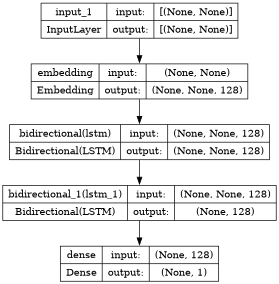

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
        show_shapes=True, 
        show_layer_names=True, 
        expand_nested=True, 
        dpi=50, 
        to_file="IMDB_Movie_Sentiment_classification_Bidirectional_LSTM.png"
)

# Load the IMDB movie review sentiment data

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_test), "Test sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

25000 Training sequences
25000 Test sequences


# Train and evaluate the model

In [7]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 209s 236ms/step - loss: 0.3780 - accuracy: 0.8312 - val_loss: 0.3313 - val_accuracy: 0.8622
Epoch 2/5
782/782 [==============================] - 200s 256ms/step - loss: 0.2037 - accuracy: 0.9224 - val_loss: 0.3623 - val_accuracy: 0.8607
Epoch 3/5
782/782 [==============================] - 168s 215ms/step - loss: 0.1309 - accuracy: 0.9537 - val_loss: 0.4190 - val_accuracy: 0.8551
Epoch 4/5
782/782 [==============================] - 172s 220ms/step - loss: 0.1021 - accuracy: 0.9658 - val_loss: 0.4854 - val_accuracy: 0.8580
Epoch 5/5
782/782 [==============================] - 168s 215ms/step - loss: 0.0631 - accuracy: 0.9789 - val_loss: 0.5528 - val_accuracy: 0.8507


In [8]:
model.history.history

{'loss': [0.37800633907318115,
  0.20374125242233276,
  0.13087265193462372,
  0.10208167880773544,
  0.06313705444335938],
 'accuracy': [0.8312399983406067,
  0.9223999977111816,
  0.953719973564148,
  0.9657599925994873,
  0.9789199829101562],
 'val_loss': [0.3312667906284332,
  0.3623014986515045,
  0.4189990758895874,
  0.4853771924972534,
  0.5528132319450378],
 'val_accuracy': [0.8622000217437744,
  0.8607199788093567,
  0.8550800085067749,
  0.8579999804496765,
  0.8507199883460999]}

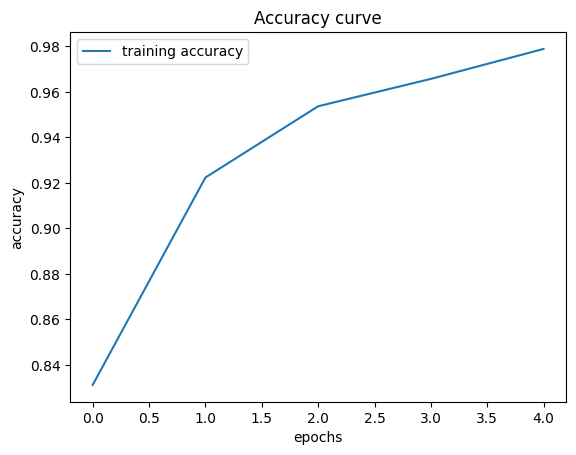

In [9]:
import matplotlib.pyplot as plt

train_acc = model.history.history['accuracy']

# Get number of epochs
epochs = range(len(train_acc))

plt.plot(train_acc, label='training accuracy')
plt.title('Accuracy curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

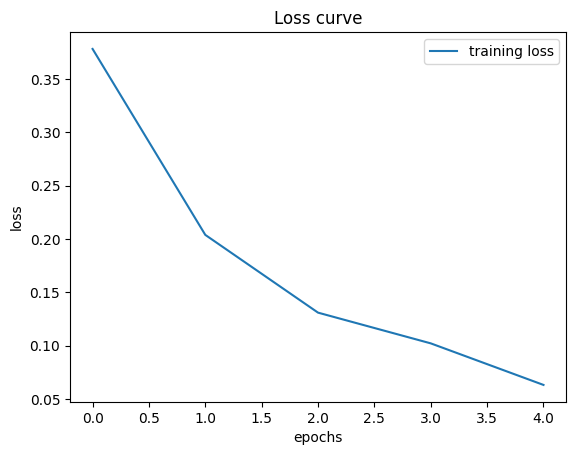

In [10]:
train_loss = model.history.history['loss']

plt.plot(train_loss, label='training loss')
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

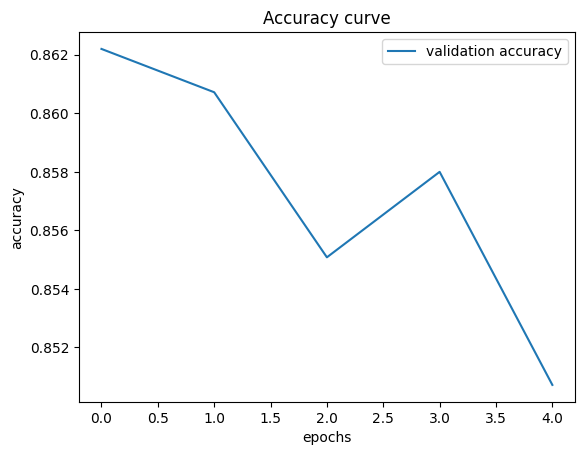

In [11]:
import matplotlib.pyplot as plt

val_accuracy = model.history.history['val_accuracy']

# Get number of epochs
epochs = range(len(train_acc))

plt.plot(val_accuracy, label='validation accuracy')
plt.title('Accuracy curve')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

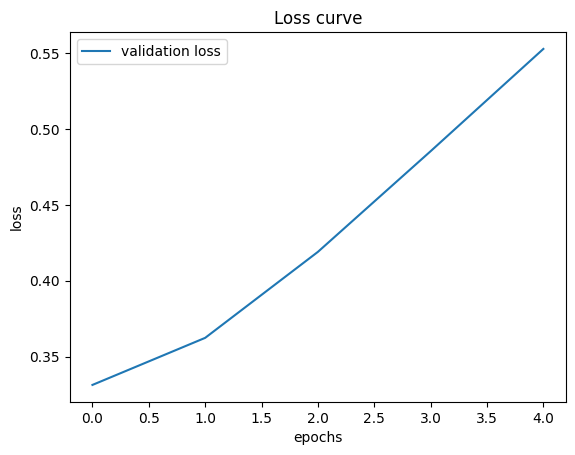

In [12]:
val_loss = model.history.history['val_loss']

plt.plot(val_loss, label='validation loss')
plt.title('Loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Resources

- https://keras.io/examples/nlp/bidirectional_lstm_imdb/

- https://www.youtube.com/watch?v=UxiDUrOhnf4

- https://blog.paperspace.com/bidirectional-rnn-keras/

- https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

- https://analyticsindiamag.com/complete-guide-to-bidirectional-lstm-with-python-codes/